In [274]:
from datetime import timedelta
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from itertools import chain, combinations, permutations
import numpy as np
import os

In [275]:
df = pd.read_parquet('../../Sonar/seatunnel_all_information.parquet')

In [276]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time',
                                'total_time',
                                'time'
                                ])]

In [277]:
# # Create a sample DataFrame
# data = {
#     'A': [1, 2, 3],
#     'B': [4, 5, 6],
#     'C': [7, 8, 9]
# }
#
# df = pd.DataFrame(data)
#
# # Get column names from the original DataFrame
# columns = df.columns
# print(columns)

In [278]:
X.iloc[:, [0,1,2]]

,commits,additions,deletions
0,1,10,4
1,1,2,1
2,1,36,67
3,1,21,2
4,8,211,212
...,...,...,...
1063,4,191,40
1064,6,470,42
1065,2,69,49
1066,1,11,1128


In [279]:
df = pd.DataFrame(X.iloc[:, [0,1,2]])
columns = df.columns

In [280]:
for r in range(1, len(columns) + 1):
    for column_combination in combinations(columns , r):
        combined_df = df[list(column_combination)]
        print(combined_df)
        combined_df.to_csv(f"{combined_df.columns.tolist()}.csv", index=False)


      commits
0           1
1           1
2           1
3           1
4           8
...       ...
1063        4
1064        6
1065        2
1066        1
1067        1

[1068 rows x 1 columns]
      additions
0            10
1             2
2            36
3            21
4           211
...         ...
1063        191
1064        470
1065         69
1066         11
1067         36

[1068 rows x 1 columns]
      deletions
0             4
1             1
2            67
3             2
4           212
...         ...
1063         40
1064         42
1065         49
1066       1128
1067          0

[1068 rows x 1 columns]
      commits  additions
0           1         10
1           1          2
2           1         36
3           1         21
4           8        211
...       ...        ...
1063        4        191
1064        6        470
1065        2         69
1066        1         11
1067        1         36

[1068 rows x 2 columns]
      commits  deletions
0           1          

In [281]:
directory_path = 'D:\origin-source-code-bill\models\KMeans\CSV'

In [282]:
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

In [283]:
csv_files

["['additions', 'deletions'].csv",
 "['additions'].csv",
 "['commits', 'additions', 'deletions'].csv",
 "['commits', 'additions'].csv",
 "['commits', 'deletions'].csv",
 "['commits'].csv",
 "['deletions'].csv"]

In [323]:
data_dict = {}
scaler = MinMaxScaler()
scaled_dataframes = []


# Loop through the CSV files and read each file into a separate DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    print("file :::" , file_path)
    variable_name = os.path.splitext(csv_file)[0]
    print("Var ::" , variable_name)
    df_col_combined = pd.read_csv(file_path)
    print("DF ::" , df_col_combined)
    # data_dict[variable_name] = df_col_combined
    # print("Dict DF:::",data_dict[variable_name])
    scaled_data = scaler.fit_transform(df_col_combined)
    print("Scaled :::", scaled_data)
    scaled_df = pd.DataFrame(scaled_data, columns=df_col_combined.columns)
    scaled_df = scaled_df.T
    scaled_df.columns = [i for i in range(len(scaled_df.columns))]
    scaled_df.reset_index(drop=True, inplace=True)
    scaled_dataframes.append(scaled_df)
    print("scaled_df:::" , scaled_df)


file ::: D:\origin-source-code-bill\models\KMeans\CSV\['additions', 'deletions'].csv
Var :: ['additions', 'deletions']
DF ::       additions  deletions
0            10          4
1             2          1
2            36         67
3            21          2
4           211        212
...         ...        ...
1063        191         40
1064        470         42
1065         69         49
1066         11       1128
1067         36          0

[1068 rows x 2 columns]
Scaled ::: [[2.62350132e-04 1.42846940e-04]
 [5.24700265e-05 3.57117349e-05]
 [9.44460477e-04 2.39268624e-03]
 ...
 [1.81021591e-03 1.74987501e-03]
 [2.88585146e-04 4.02828369e-02]
 [9.44460477e-04 0.00000000e+00]]
scaled_df:::        0         1         2         3         4         5         6     \
0  0.000262  0.000052  0.000944  0.000551  0.005536  0.002912  0.000446   
1  0.000143  0.000036  0.002393  0.000071  0.007571  0.000607  0.000214   

       7         8         9     ...      1058      1059      1060      

In [324]:
scaled_dataframes

[       0         1         2         3         4         5         6     \
 0  0.000262  0.000052  0.000944  0.000551  0.005536  0.002912  0.000446   
 1  0.000143  0.000036  0.002393  0.000071  0.007571  0.000607  0.000214   
 
        7         8         9     ...      1058      1059      1060      1061  \
 0  0.000577  0.002256  0.008605  ...  0.026838  0.016239  0.002230  0.013065   
 1  0.000429  0.001714  0.005285  ...  0.004321  0.000321  0.000857  0.000107   
 
        1062      1063     1064     1065      1066      1067  
 0  0.006742  0.005011  0.01233  0.00181  0.000289  0.000944  
 1  0.001821  0.001428  0.00150  0.00175  0.040283  0.000000  
 
 [2 rows x 1068 columns],
        0         1         2         3         4         5         6     \
 0  0.000262  0.000052  0.000944  0.000551  0.005536  0.002912  0.000446   
 
        7         8         9     ...      1058      1059     1060      1061  \
 0  0.000577  0.002256  0.008605  ...  0.026838  0.016239  0.00223  0.0130

In [325]:
type(scaled_dataframes)

list

In [335]:
df_scal = pd.DataFrame(scaled_dataframes)
pd.set_option('display.max_rows', None)
df_scal

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,0 1 2 3 ...
1,0 1 2 3 ...
2,0 1 2 3 ...
3,0 1 2 3 ...
4,0 1 2 3 ...
5,0 1 2 3 4 5 ...
6,0 1 2 3 ...


In [333]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2,10):
    print("I :::::" , i)
    km = KMeans(n_clusters=i)
    labels = km.fit_predict(df_scal)
    silhouette_avg = silhouette_score(df_scal, km.labels_).round(4)
    silhouette_scores.append(silhouette_avg)
    # km = KMeans(n_clusters=i)
    # print(km)
    # km.fit(df_scal)
    # labels = km.predict(df_scal)
    # print(labels)
    # sil_avg = silhouette_score(df_scal, km.labels_).round(4)
    # print(sil_avg)
    # silhouette_scores.append(sil_avg)
    # print(silhouette_scores)

    # Create an empty list to store silhouette scores
# silhouette_scores = []
#
# # Loop through different numbers of clusters
# for n_clusters in n_clusters_range:
#     km = KMeans(n_clusters=n_clusters)
#     labels = km.fit_predict(df)
#     silhouette_avg = silhouette_score(df, km.labels_).round(4)
#     silhouette_scores.append(silhouette_avg)

I ::::: 2


ValueError: setting an array element with a sequence.

<class 'pandas.core.frame.DataFrame'>


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

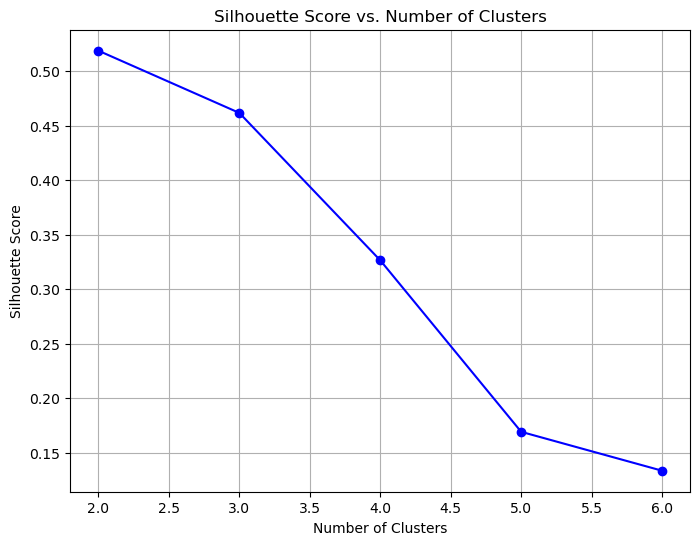

In [321]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create a sample DataFrame with one column (replace with your data)
# data = {
#     'Value': [0         1         2         3         4         5     \
# deletions  0.000143  0.000036  0.002393  0.000071  0.007571  0.000607
#                6         7         8         9 ]
# }
print(type(df))
df = pd.DataFrame(data)

# Initialize KMeans parameters
n_clusters_range = range(2, len(df))  # Adjust the range of clusters you want to try

# Create an empty list to store silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in n_clusters_range:
    km = KMeans(n_clusters=n_clusters)
    labels = km.fit_predict(df)
    silhouette_avg = silhouette_score(df, km.labels_).round(4)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()
